# 추론통계학

정규분포

도수(度數) 분포 곡선이 평균값을 중앙으로 하여 좌우 대칭으로 종 모양을 이루는 분포.

[문제] 다음과 같이 10개의 전기기구의 수리시간에 대한 데이터를 얻었다. 전기기구를 고치는 데까지 걸리는 시간은 정규분포를 따른다고 할 수 있다. (단위:시간)

159, 280, 101, 121, 224, 222, 379, 179, 250, 170

<ul>
<li>(a) 평균 수리시간이 225시간이라고 할 수 있는지 알고자 한다. 적절한 통계적 가설을 세우시오.</li>
<li>(b) 평균, 중앙값, 분산, 표준 편차를 구하시오.</li>
<li>(c) 평균 수리시간에 대한 95% 신뢰구간을 구하시오.</li>
<li>(d) (a) 에서 세운 가설에 대해 유의수준 a=10.05로 검정하고 결론을 쓰시고.</li>
<li>(e) 평균 수리시간에 대한 90%신뢰 구간을 구하시오.</li>
<li>(f) 수리시간 값에 log를 취한 변수 Y를 생성하시오.</li>
<li>(g) Y의 평균과 분산을 구하시오. </li>
</ul>

In [1]:
import numpy as np
import math as m
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
dataList = [159, 280, 101, 121, 224, 222, 379, 179, 250, 170]

(a)<br>
H0 : 전기기구의 평균 수리시간은 255시간이다.<br>
H1 : 전기기구의 평균 수리시간은 225시간이 아니다.

In [3]:
#(b)
m=np.mean(dataList)
print("mean:",m)
print("median:",np.median(dataList))
print("var:",np.var(dataList,ddof=1))
print("std:",np.std(dataList,ddof=1))

mean: 208.5
median: 200.5
var: 6704.722222222223
std: 81.88236820111044


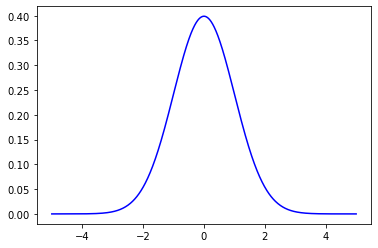

In [4]:
#정규분포그리기
#mu = 0(255지만~표준Z로 변환해 0)
#sigma = 1(표준편차 : 81.88236820111044)

from scipy.special import erf

plt.figure(1)
plt.figurefigsize=(10,6)

x=np.linspace(-5,5,1000)  #X축 구간설정
mu=0.0
sigma = 1.0

gaussian_f = (1/(sigma *np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/(2*sigma*sigma))

#pdf_gaussian=map(gaussian_f, dataList)

plt.plot(x,gaussian_f, c='b', label ="Gaussian Distribution, N(0,1)")

<h3>신뢰구간 예제:</h3>
<p> 어느 대학교 남학생 47명의 평균 키가 175cm,, 표준 편차가 5cm이었다. 이 대학교 남학생들의 키에 대한 모평균의 신뢰도 95% 신뢰구간을 구하라.</p>

In [5]:
import numpy as np
import math

#모평균, 모표준편차, 표본 수
sd = 5
mu = 175
n = 47

#z통계량 : 1.96
z_95_1 = stats.norm.ppf(1-(1-0.95)/2)  #신뢰구간
print("z_95_1 : ", z_95_1)

#신뢰구간 계산
L_value = round(mu-z_95_1 *(sd/math.sqrt(n)), 2) #z 공식을 이용해 -2편차에 해당하는 평균값(소수점2째자리에서 반올림)을 구함
H_value = round(mu+z_95_1 *(sd/math.sqrt(n)), 2)

print('신뢰구간:', L_value, '~', H_value)
print('{} < {} < {}'.format(L_value, mu, H_value ))

NameError: name 'stats' is not defined

In [ ]:
#한글처리를 위한코드
from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
#시각화
standard_norm = stats.norm(175,5) #평균이 175이고, 편차가 5인 정규분포를 따르른 집단

x=np.linspace(120, 230, 100) #최소, 최대, 간격

plt.vlines(L_value, 0, standard_norm.pdf(L_value), color='r', lw=0.5) #stats.norm.pdf (x, loc=mean, scale=std_dev)
plt.vlines(H_value, 0, standard_norm.pdf(L_value), color='r', lw=0.5) #stats.norm.pdf (x, loc=mean, scale=std_dev)
plt.plot(x, stanard_norm.pdf(x), 'b--', lw=2, alpha=0.6, label='norm pdf')

plt.title('신뢰구간 시각화') #한글처리설정추가해야함
plt.legend()
plt.show()

In [ ]:
#(c)
n=len(dataList)
sd=np.std(dataList,ddof=1)

cri=sp.stats.norm.ppf(loc=0,scale=1,q=0.975) #신뢰구간 

lower=m-cri*sd/np.sqrt(n) #하한값
upper=m+cri*sd/np.sqrt(n)  #상한값
print(lower); print(upper)

## 평균검정

In [ ]:
import scipy.stats as stats

stat, pvalue = stats.shapiro(dataList)
print(stat, pvalue)
print(f'[정규성검정] H0 - 정규성을 만족 : {pvalue>0.05}')

In [ ]:
#(d)
sp.stats.ttest_1samp(dataList,225)
# 검정통계량=-0.637 이고pvalue=0.54>0.05 이므로 유의수준 0.05에서 귀무가설을 기각하지 못한다.
# 따라서 유의수준 0.05에서 전기기구의 평균 수리시간은 225시간이라고 할 수 있다.

In [ ]:
#(e)
cri=sp.stats.norm.ppf(loc=0,scale=1,q=0.95)
lower=m-cri*sd/np.sqrt(n)
upper=m+cri*sd/np.sqrt(n)
print(lower); print(upper)

In [ ]:
#(f)
y=np.log1p(dataList)
y

In [ ]:
 #(g)
print("mean:",np.mean(y))
print("var:",np.var(y,ddof=1))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#일표본-t-test" data-toc-modified-id="일표본-t-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>일표본 t-test</a></span></li><li><span><a href="#대응표본-t-test" data-toc-modified-id="대응표본-t-test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>대응표본 t-test</a></span></li><li><span><a href="#독립표본-t-test" data-toc-modified-id="독립표본-t-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>독립표본 t-test</a></span></li></ul></div>

# 일표본 t-test

 cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지 통계적 검정을 수행하고, 결과를 해석해보자(양측검정, 유의수준 : 0.05).

In [8]:
import pandas as pd
cats=pd.read_csv('./data/cats.csv')
cats

FileNotFoundError: [Errno 2] No such file or directory: './data/cats.csv'

Bwt 컬럼은 고양이의 몸무게를 의미하고, Hwt는 고양이의 길이를 의미한다. 
cats의 데이터의 정보를 info로 확인해준다. 

In [3]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


고양이의 몸무게가 2.6kg인지를 검정하므로 mu변수에 2.6을 할당한다. 그리고 고양이의 몸무게만 추출하여 shapro.test를 통해 정규성을 검정한다.
shapiro test를 통해 데이터의 정규성을 검정한다. 고양이의 몸무게를 검정하므로 고양이의 몸무게만 추출하여 shapiro test를 진행해야 한다. 

In [5]:
import scipy.stats as stats
from scipy.stats import shapiro
mu =2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

[결과해석]
첫번째 값 (검정통계치) : 0.95187
두번째 값 (p-value) : 6.730e-05
유의수준보다 작으므로 '데이터가 정규분포를 따른다'는 귀무가설을 기각한다. 즉, cats 데이이터의 Bwt 변수는 정규분포를 따르지 않는다. 데이터가 정규분포를 따르지 않으므로 wilcox test 로 t-test를 진행한다. 만약, 정규분포를 따른다면 stats.ttest_1samp(cats.Bwt, popmean=mu)를 사용하면 된다. 

In [6]:
stats.wilcoxon(cats.Bwt - mu , alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Text(0, 0.5, 'Count')

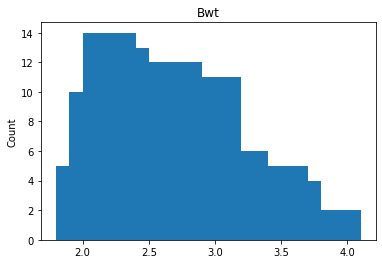

In [7]:
import matplotlib.pyplot as plt
cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)  #type(cats['Bwt']) 과 비교하면 cats['Bwt'].values는 ndarray객체
width =0.4
plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values,width)
plt.title('Bwt')
plt.ylabel('Count')

In [14]:
cats_Bwt_cnt.index

Float64Index([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3.0, 2.8, 3.1, 3.2,
              3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9],
             dtype='float64')

시각화한 고양이 몸무게의 그래프를 보더라도, 해당 데이터는 정규성을 띄지 않음을 알 수 있으며, Wilcoxon test 결과 p-value는 유의수준 0.05보다 작으므로 "고양이의 몸무게가 2.6kg이다"라는 귀무가설을 기각할 수 있다. 즉, 유의수준 0.05 하에 고양이이 평균 몸무게는 2.6kg라고 할 수 없다.

# 대응표본 t-test
- 단일 모집단에 대해 어떠한 처리를 가했을 때, 처리 전후에 따른 평균의 차이를 비교할 때 사용한다.

10명의 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하였다.  
영양제의 효과가 있는지를 판단해보자. 

In [6]:
# 데이터 불러오기 및 확인 
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data
data.mean()


before    4.3
after     5.3
dtype: float64

해당 데이터를 검정하기 위한 가설 수립한다.  <br> <br>
귀무가설(H0) <br>
수면제 복용 전과 후의 수면시간 차이는 없다. <br>
대립가설(H1)<br>
수면제 복용 전과 후의 수면시간 차이는 있다. <br>


In [7]:
import scipy.stats as stats
stats.ttest_rel(data['after'],data['before'],alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

In [8]:
data.mean()

before    4.3
after     5.3
dtype: float64

[결과해석]
p-value가 유의수준보다 작으므로 '수면영양제를 복용하기 전과 후의 평균 수면시간의 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다'는 결론을 낼 수 있다. 

# 독립표본 t-test
- 두 개의 독립된 모집단의 평균을 비교할 때 사용한다.

연구환경
<p>귀무가설 : 수컷과 암컷 고양이의 몸무게 차이는 없다.<p>
<p>가설 : 수컷과 암컷 고양이의 몸무게 차이는 있다.</p>


In [16]:
import pandas as pd
cats=pd.read_csv('./data/cats.csv')

female = cats.loc[cats.Sex =='F', 'Bwt']
male = cats.loc[cats.Sex =='M', 'Bwt']
stats.levene(female, male)


LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [17]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [18]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


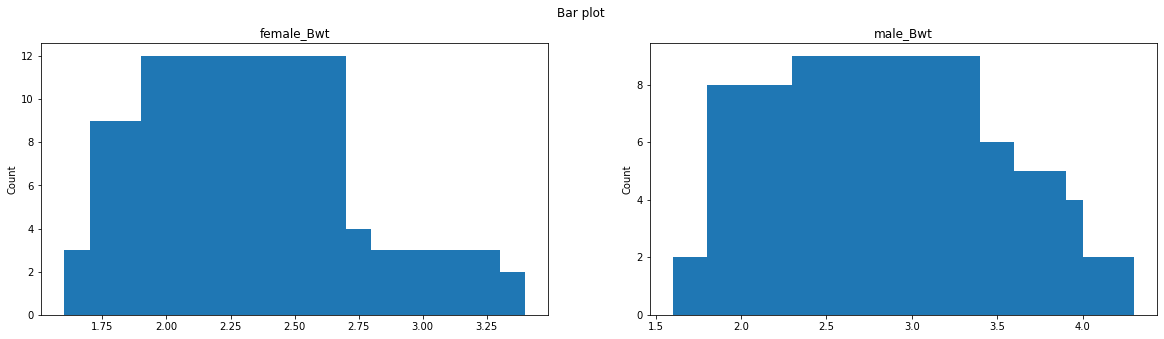

In [19]:
#검정 결과와 평균값을 확인하였지만, 이를 시각화하여 데이터의 분포가 어떠한 차이가 있는지 명확하게 파악해볼 수 있다.
female_Bwt_cnt = pd.value_counts(female.values, sort=False)
male_Bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Bar plot')
width =0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_Bwt_cnt.index, male_Bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')
plt.show()